# Data Science Prüfungsleistung 2023
- Bearbeiter: 2090617, XXXXX
- Abgabefrist: 08.05.2023, 18Uhr
- Abzugeben sind:
    - Programm
    - PDF-Ausdruck
    - Video
    
### Ausgangssituation

- Gegeben: Immobiliendatensatz in data_for_training.csv 
- Daten sind fiktiv
- Testdaten sind in gelöschter Spalte von data_for_test.csv
- Abgabe einer CSV-Datei mit Testdaten und Vorhersagen aus Aufgabe 4 und 5
- Datei muss korrekt formatiert sein
- Datei muss fehlerfrei auf einem Windows-Rechner geöffnet werden können
- Vorhersagen müssen korrekt enthalten sein
---

# Aufgabe 1: Business Understanding
Aus der Aufgabenstellung lassen sich folgende Informationen zusammenfassen:
- Geschäftsmodell:
    - Werbung für Handwerksdienstleistungen machen
    - Anteil für vermittelte Handwerksdienstleistungen erhalten
- Annahme: 
    - Personen in teuren Häusern geben mehr Geld für Dienstleistungen aus
- Motivation: 
    - "Wir brauchen mehr Verständnis des Verkaufspreises Z-Verkaufspreis"

### Liste der angebotenen Handwerksdiensleistungen:
- Streichen
- Tür reparieren
- neues Vordach 
- neuer Garten 
- Garagentor reparieren
- Heizung reparieren
- Schornstein fegen
- Abdichtung von Wänden (z.B. im Keller) gegen Feuchtigkeit
- Einbau von Dunstabzugshauben in der Küche

### Ziele nach dem CRISP-DM Prozess für die Haustürhandwerksleistungsvermittlung
**Ziele auf Geschäftsebene**<br>
Das grundlegende Ziel auf Geschäftsebene besteht darin, den Gewinn der Haustürhandwerksvermittlung zu steigern, indem das Verständnis für den Zusammenhang zwischen den Merkmalen von Häusern und ihrem Verkaufspreis verbessert wird. Es wird angenommen, dass Personen in teureren Häusern eher bereit sind, mehr Geld für Dienstleistungen auszugeben. Deswegen soll eine Datenanalyse eines Immobiliensatzes durchgeführt werden, um diejenigen Merkmale eines Hauses zu identifizieren, die den Verkaufspreis besonders stark beeinflussen. Auf Basis dieser Erkenntnisse soll eine gewinnmaximierende Strategie für Tür-zu-Tür-Vermittlungskampagnen entwickelt werden. Diese könnte folgendermaßen aussehen: Häuser mit Merkmalen, die auf einen hohen Verkaufspreis hinweisen, werden gezielt beworben, um Kunden anzusprechen, die eher teure Haushaltsdienstleistungen in Anspruch nehmen und somit den Gewinn maximieren. Gleichzeitig sollen Kunden vermieden werden, bei denen eine Werbung unwahrscheinlich zum Gewinn beiträgt und nur Zeit und Aufwand produziert.

**Anforderungen an das Ergebnis:**<br>
Um sicherzustellen, dass das Vorhersagemodell, das den Verkaufspreis eines Hauses basierend auf historischen Daten und Merkmalen vorhersagt, für das Unternehmen nützlich ist, muss es eine hohe Vorhersagegenauigkeit sowohl für Trainings- als auch für neue Daten aufweisen. Um dies zu erreichen, müssen die Daten entsprechend getestet, validiert und auf Über- und Unteranpassung geprüft werden. Nur so kann beurteilt werden, ob die Vorhersagen des Modells tatsächlich brauchbar sind. Um das Ergebnis der Datenanalyse für das Management und weitere Stakeholder verständlich zu machen, muss es visuell dargestellt werden. Ein auf das Vorhersagemodell basierender Strategieplan soll also ausreichend transparent und erklärbar sein.

**Zu beantwortende Fragestellungen:**
    <ul>
    <li>1. Welchen Einfluss haben die folgende Merkmale auf den Verkaufspreis?</li>
        <ol> 
        <li>Allgemeine Eigenschaften:</li>
            <ul>
                <li>Lage</li>
                <li>Grundstueck in qm</li>
                <li>Steuerzuordnung</li>
            </ul>
        <li>Qualitaet und Zustand:</li>
            <ul>
                <li>Außenqualität</li>
                <li>Außenzustand</li>
                <li>(Gesamt-)Qualitaet</li>
                <li>Zustand</li>
                <li>Kuechenzustand</li>            
                <li>Kaminqualitaet</li>
                <li>Heizungszustand</li>
            </ul>
        <li>Bau- und Renovierungsjahr:</li>
            <ul>
                <li>Baujahr</li>
                <li>Garagenbaujahr</li>
                <li>Renovierungsjahr</li>
                <li>Verkaufsjahr</li>
            </ul>
        <li>Zusatzmerkmale:</li>
            <ul>
                <li>Besonderheiten</li>
                <li>Stellplätze in der Garage</li>
                <li>Kaminanzahl</li>
                <li>Kellertyp</li>
            </ul>
        </ol>
    <li>2. Welche Merkmale korrellieren stark untereinander?</li>
    <li>3. Welche Merkmalsgruppen/Merkmale haben den größten Einfluss auf den Verkaufspreis?</li>
    <li>4. Welche Kombination von Merkmalen haben den größten Einfluss auf den Verkaufspreis?</li>
    </ul>
**Beispielhafte Antworten oder Ergebnisse:**
<ul>
    <li>Zu 1.: Der Kellertyp hat keinen Einfluss auf den Verkaufspreis</li>
    <li>Zu 2.: Je neuer das Grundstück, desto besser ist der Zustand des Hauses mit <i>corr(grundstueck_qm, qualitaet) = 0.89</i></li>
    <li>Zu 3.: Die allgemeinen Eigenschaften haben den größten Einfluss auf den Verkaufspreis.</li>
    <li>Zu 4.: Lage und Größe des Grundstücks haben kombiniert den größten Eifnluss auf den Verkaufspreis.</li>
</ul>

# Aufgabe 2: Data Exploration und Analyse
1. Laden und Untersuchung des Datensatzes in data_for_training.csv nach den Regeln aus der Vorlesung
2. Mit Mark-Up wichtige Erkenntnisse dokumentieren 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Laden des Datensatzes 
data = pd.read_csv("data_for_training.csv", sep=";")

# Gruppieren der Merkmale in Merkmalsgruppen und laden in Dataframes
data_allg_eigenschaften = data[["Lage", "Grundstueck_qm", "Steuerzuordnung"]]
data_qualitaet_und_zustand = data[["Aussenqualitaet", "Aussenzustand", "Heizungszustand", "Kaminqualitaet", "Kuechenzustand", "Qualitaet", "Zustand"]]
data_jahreszahlen = data[["Baujahr", "Garagenbaujahr", "Renovierungsjahr", "Verkaufsjahr"]]
data_zusatzmerkmale = data[["Besonderheiten", "Garagen", "Kamine", "Keller"]]

data.head()

,A_Index,Aussenqualitaet,Aussenzustand,Baujahr,Besonderheiten,Garagen,Garagenbaujahr,Grundstueck_qm,Heizungszustand,Kamine,...,Keller,Kuechenzustand,Lage,Qualitaet,Renovierungsjahr,Steuerzuordnung,Verkaufsjahr,Wohnflaeche_qm,Zustand,Zz_Verkaufspreis
0,2379,Gut,Gut,1987.0,NaN,2.0,1987.0,856,Sehr gut,1,...,Rohbau,Durchschnitt,Heroes Park,6,2005.0,5,2018,1855,7,227514
1,39,Durchschnitt,Durchschnitt,1930.0,NaN,1.0,2007.0,537,Gut,0,...,Mittlerer Wohnraum,Schlecht,Lower East Side,4,1960.0,1,2017,960,4,126929
2,972,Durchschnitt,Durchschnitt,1968.0,NaN,1.0,1968.0,673,Schlecht,0,...,Kein Wohnraum,Durchschnitt,Queensland Doors,5,1995.0,3,2017,912,7,140383
3,561,Durchschnitt,Durchschnitt,1963.0,NaN,2.0,1963.0,1168,Durchschnitt,0,...,Freizeitraum,Durchschnitt,Queensland Doors,5,0.0,1,2021,1112,5,172439
4,2088,Durchschnitt,Durchschnitt,1932.0,NaN,1.0,1932.0,654,Sehr gut,1,...,Rohbau,Durchschnitt,Upper East Side,7,1961.0,1,2019,1424,8,212573


### Untersuchung aller Daten

In [3]:
data.describe()

,A_Index,Baujahr,Garagen,Garagenbaujahr,Grundstueck_qm,Kamine,Qualitaet,Renovierungsjahr,Steuerzuordnung,Verkaufsjahr,Wohnflaeche_qm,Zustand,Zz_Verkaufspreis
count,2384.000000,2384.000000,2384.000000,2255.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000
mean,1322.240772,1980.247064,1.716862,1987.286031,903.817114,0.596057,5.975252,913.453020,2.998742,2019.153943,1477.146812,5.603607,216001.574664
std,765.557203,29.531973,0.736861,24.502436,743.500029,0.652315,1.358756,994.753847,1.417917,2.571390,489.139942,1.133255,93615.969173
min,0.000000,1884.000000,0.000000,1907.000000,110.000000,0.000000,1.000000,0.000000,1.000000,2015.000000,334.000000,1.000000,16575.000000
25%,659.750000,1963.000000,1.000000,1971.000000,661.750000,0.000000,5.000000,0.000000,2.000000,2017.000000,1096.750000,5.000000,154925.750000
50%,1317.500000,1982.000000,2.000000,1988.000000,840.500000,1.000000,6.000000,0.000000,3.000000,2019.000000,1430.000000,5.000000,195379.000000
75%,1989.500000,2008.000000,2.000000,2010.000000,1021.000000,1.000000,7.000000,2005.000000,4.000000,2021.000000,1728.000000,6.000000,253063.000000
max,2648.000000,2022.000000,5.000000,2022.000000,19365.000000,4.000000,10.000000,2023.000000,5.000000,2023.000000,4476.000000,9.000000,906406.000000


### Untersuchung der numerischen Daten

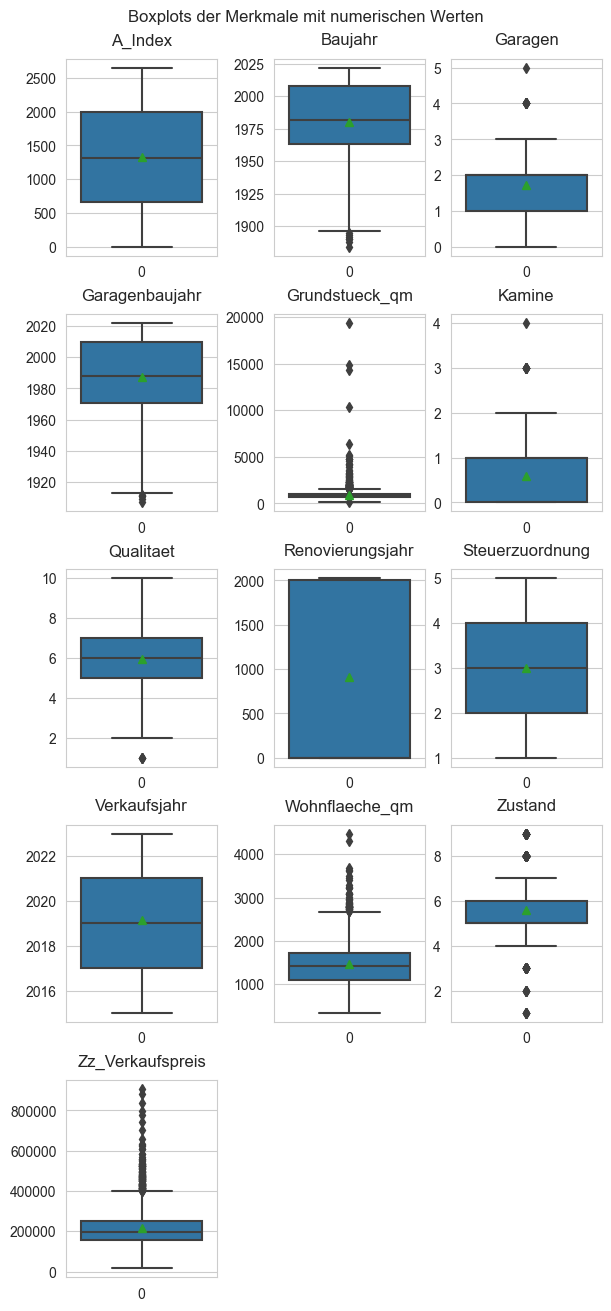

In [8]:
from pandas.api.types import is_numeric_dtype

fig, axes = plt.subplots(5,3, figsize=(6, 13), sharey=False, constrained_layout=True)
fig.suptitle("Boxplots der Merkmale mit numerischen Werten")


j = 0
k = 0

for i in data.columns:
    if is_numeric_dtype(data[i]):
        if(k == 3):
            k = 0
            j += 1
        sns.boxplot(data=data[i], ax=axes[j][k], showmeans=True)
        axes[j][k].set_title(i, pad=10)
        k += 1
sns.set_style("whitegrid")

# Löschen leerer Subplots
fig.delaxes(axes[4][1])
fig.delaxes(axes[4][2])
plt.show()

### Untersuchung der kardinalen Daten

C:\Users\jbai\AppData\Local\Temp\ipykernel_1964\3504297100.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[j][k].set_xticklabels(axes[j][k].get_xticklabels(), rotation=40, ha="right")
C:\Users\jbai\AppData\Local\Temp\ipykernel_1964\3504297100.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[j][k].set_xticklabels(axes[j][k].get_xticklabels(), rotation=40, ha="right")
C:\Users\jbai\AppData\Local\Temp\ipykernel_1964\3504297100.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[j][k].set_xticklabels(axes[j][k].get_xticklabels(), rotation=40, ha="right")
C:\Users\jbai\AppData\Local\Temp\ipykernel_1964\3504297100.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[j][k].set_xticklabels(axes[j][k].get_xticklabels(), rotation=40, ha="right")
C:\Users\jbai\AppData\Local\Temp\ipykernel_1964\3504297100.py:18: UserWarning: FixedFormatter should

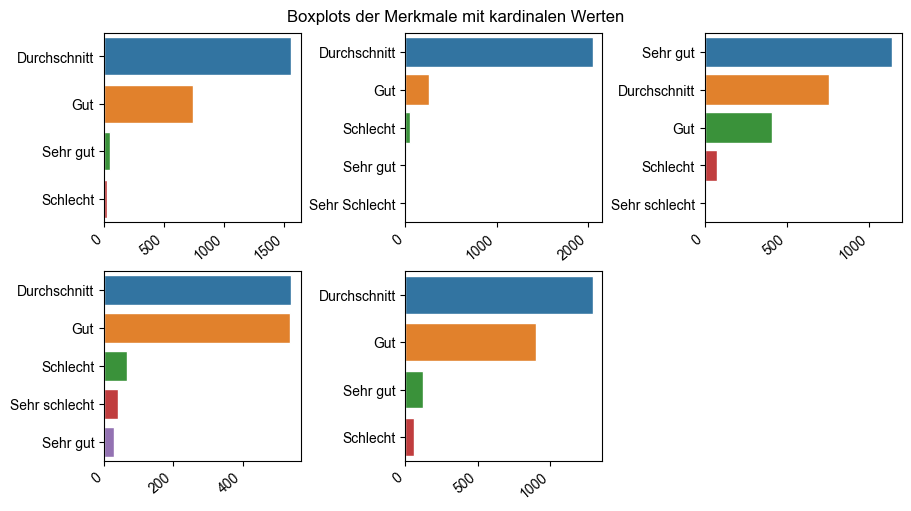

In [5]:
from pandas.api.types import is_object_dtype

# Untersuchung der nominalen Daten
fig, axes = plt.subplots(2,3, figsize=(9, 5), sharey=False, constrained_layout=True)
fig.suptitle("Boxplots der Merkmale mit kardinalen Werten")

j = 0
k = 0
for i in data.columns:
    if is_object_dtype(data[i]):
        if(i != "Keller" and i != "Lage" and i != "Besonderheiten"):
            if(k == 3):
                k = 0
                j += 1
            counts = data[i].value_counts()
            sns.set_style("whitegrid")
            sns.barplot(y=counts.index, x=counts.values, ax=axes[j][k], orient="h")
            axes[j][k].set_xticklabels(axes[j][k].get_xticklabels(), rotation=40, ha="right")
            k += 1
sns.set_style("whitegrid")

# Löschen leerer Subplots
fig.delaxes(axes[1][2])

plt.show()

In [6]:
Untersuchung der nominalen Daten

SyntaxError: invalid syntax (3239870584.py, line 1)

C:\Users\jbai\AppData\Local\Temp\ipykernel_20820\1844534563.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=40, ha="right")
C:\Users\jbai\AppData\Local\Temp\ipykernel_20820\1844534563.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=40, ha="right")
C:\Users\jbai\AppData\Local\Temp\ipykernel_20820\1844534563.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=40, ha="right")


TypeError: object of type 'ListedColormap' has no len()

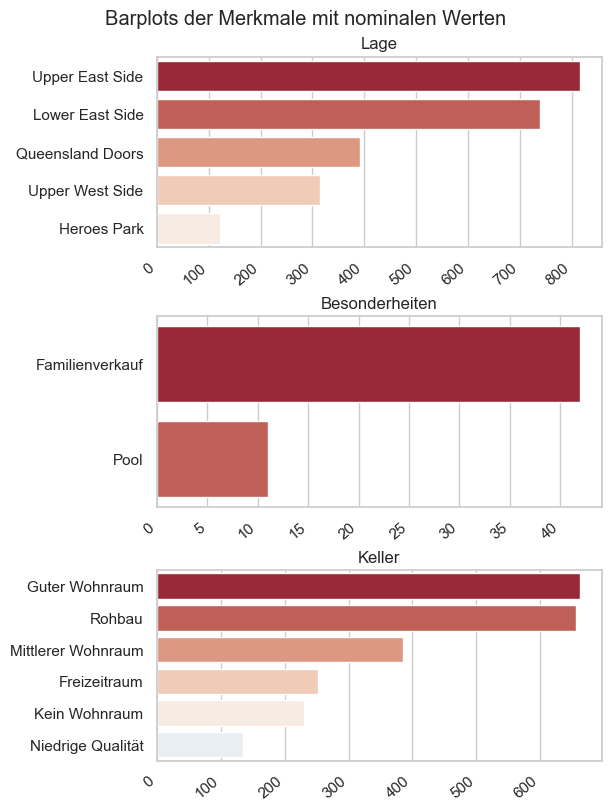

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(6, 8), sharey=False, constrained_layout=True)
fig.suptitle("Barplots der Merkmale mit nominalen Werten")

counts_lage = data["Lage"].value_counts()
counts_besonderheiten = data["Besonderheiten"].value_counts()
counts_keller = data["Keller"].value_counts()

sns.barplot(y=counts_lage.index, x=counts_lage.values, ax=axes[0], orient="h")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=40, ha="right")
axes[0].set_title("Lage")

sns.barplot(y=counts_besonderheiten.index, x=counts_besonderheiten.values, ax=axes[1], orient="h")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=40, ha="right")
axes[1].set_title("Besonderheiten")

sns.barplot(y=counts_keller.index, x=counts_keller.values, ax=axes[2], orient="h")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=40, ha="right")
axes[2].set_title("Keller")

sns.set_style("whitegrid")
diverging_colors = sns.color_palette("crest", as_cmap=True)
sns.set_palette(diverging_colors)
